In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)

In [8]:
print(df.head())
print(df.info())
print(df.isnull().sum())

  day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire     
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null 

In [9]:
for item in df['day'].unique():
    print(f"'{item}'")

'01'
'02'
'03'
'04'
'05'
'06'
'07'
'08'
'09'
'10'
'11'
'12'
'13'
'14'
'15'
'16'
'17'
'18'
'19'
'20'
'21'
'22'
'23'
'24'
'25'
'26'
'27'
'28'
'29'
'30'
'31'
'Sidi-Bel Abbes Region Dataset'
'day'


In [11]:
split_index = df[df['day'] == 'Sidi-Bel Abbes Region Dataset'].index[0]

df_bejaia = df.iloc[:split_index].copy()
df_sidi = df.iloc[split_index+2:].copy()

df_bejaia['Region'] = 'Bejaia'
df_sidi['Region'] = 'Sidi Bel-abbes'

In [12]:
df_clean = pd.concat([df_bejaia, df_sidi], ignore_index=True)

In [13]:
df_clean.columns = df_clean.columns.str.strip()
print(df_clean.columns)

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


In [14]:
df_clean = df_clean.dropna().reset_index(drop=True)

In [15]:
numeric_cols = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

df_clean[numeric_cols] = df_clean[numeric_cols].apply(pd.to_numeric)

df_clean[['day', 'month', 'year']] = df_clean[['day', 'month', 'year']].astype(int)

In [16]:
df_clean['Classes'] = df_clean['Classes'].str.strip()

df_clean['Fire'] = df_clean['Classes'].map({'fire': 1, 'not fire': 0})

In [17]:
df_clean['Date'] = pd.to_datetime(df_clean[['year', 'month', 'day']])

In [18]:
print(df_clean.info())
print(df_clean.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          243 non-null    int64         
 1   month        243 non-null    int64         
 2   year         243 non-null    int64         
 3   Temperature  243 non-null    int64         
 4   RH           243 non-null    int64         
 5   Ws           243 non-null    int64         
 6   Rain         243 non-null    float64       
 7   FFMC         243 non-null    float64       
 8   DMC          243 non-null    float64       
 9   DC           243 non-null    float64       
 10  ISI          243 non-null    float64       
 11  BUI          243 non-null    float64       
 12  FWI          243 non-null    float64       
 13  Classes      243 non-null    object        
 14  Region       243 non-null    object        
 15  Fire         243 non-null    int64         
 16  Date    

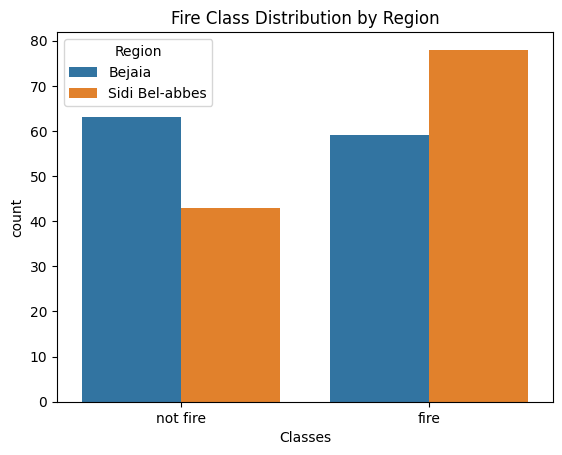

In [19]:
sns.countplot(x='Classes', data=df_clean, hue='Region')
plt.title('Fire Class Distribution by Region')
plt.show()

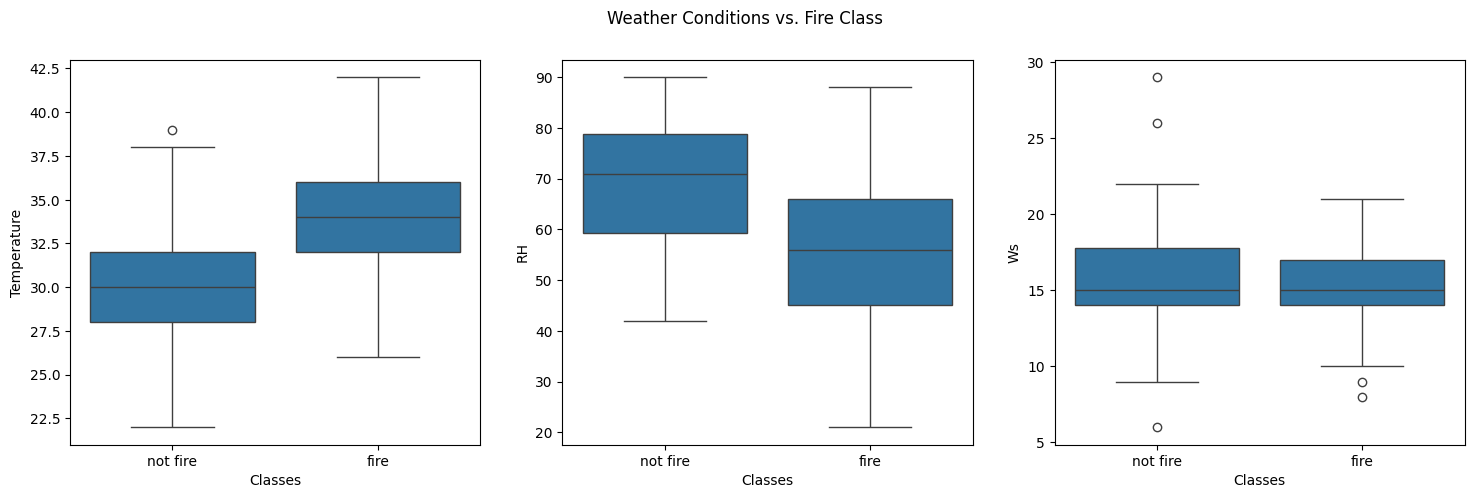

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(ax=axes[0], x='Classes', y='Temperature', data=df_clean)
sns.boxplot(ax=axes[1], x='Classes', y='RH', data=df_clean)
sns.boxplot(ax=axes[2], x='Classes', y='Ws', data=df_clean)
plt.suptitle('Weather Conditions vs. Fire Class')
plt.show()

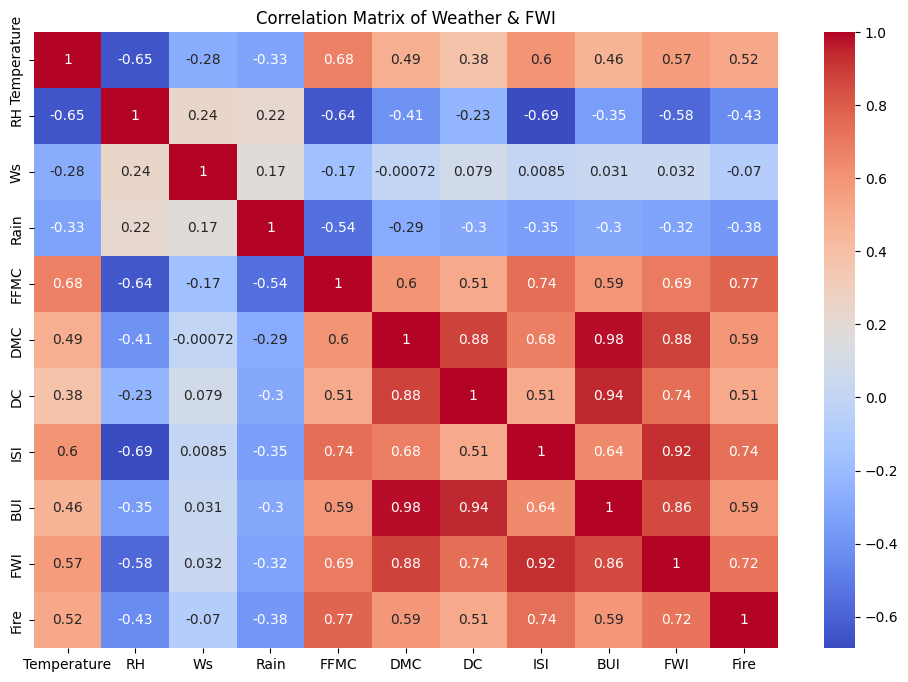

In [21]:
corr_df = df_clean[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Fire']]
plt.figure(figsize=(12, 8))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Weather & FWI')
plt.show()

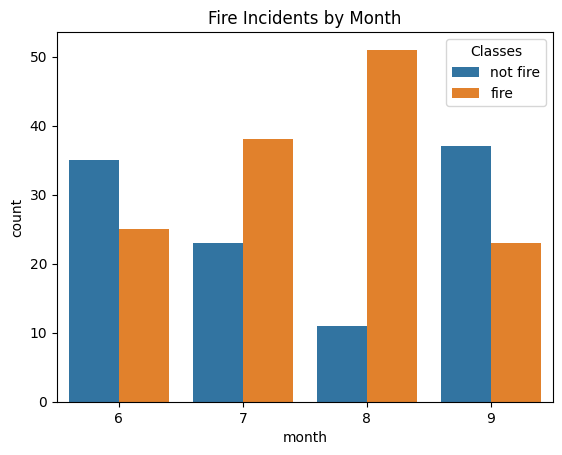

In [22]:
sns.countplot(x='month', data=df_clean, hue='Classes')
plt.title('Fire Incidents by Month')
plt.show()

In [25]:
df_clean.to_csv('algerian_fires_clean.csv', index=False)